### work with dates and times in pandas

In [1]:
import pandas as pd
ufo = pd.read_csv('http://bit.ly/uforeports')

In [2]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [3]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [5]:
ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [6]:
ufo['Time'] = pd.to_datetime(ufo.Time)

In [9]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [10]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [11]:
ufo.Time.dt.day

0         1
1        30
2        15
3         1
4        18
         ..
18236    31
18237    31
18238    31
18239    31
18240    31
Name: Time, Length: 18241, dtype: int64

In [12]:
ufo.Time.dt.weekday

0        6
1        0
2        6
3        0
4        1
        ..
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int64

In [20]:
#ufo.Time.dt.day_of_week  #ufo.Time.dt.hour

In [24]:
ts = pd.to_datetime('1/1/1999')

In [26]:
ufo.loc[ufo.Time >= ts, :]

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [27]:
ufo.Time.max() 

Timestamp('2000-12-31 23:59:00')

In [28]:
ufo.Time.max() -ufo.Time.min()  

Timedelta('25781 days 01:59:00')

In [29]:
(ufo.Time.max() -ufo.Time.min()).days  # time delta objects

25781

In [30]:
%matplotlib inline

In [31]:
ufo['Year'] = ufo.Time.dt.year

In [32]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [34]:
ufo.Year.value_counts()

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
        ... 
1941       2
1936       2
1935       1
1934       1
1933       1
Name: Year, Length: 68, dtype: int64

In [35]:
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
Name: Year, Length: 68, dtype: int64

<AxesSubplot:>

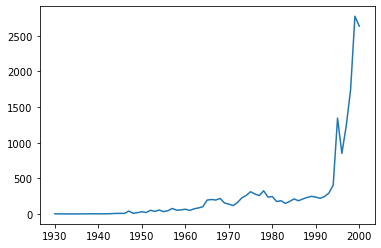

In [36]:
ufo.Year.value_counts().sort_index().plot()

### find and remove duplicate rows in pandas

In [37]:
# read a dataset of movie reviewers (modifying the default parameter values for read_table)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col= 'user_id')

In [38]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [39]:
users.shape

(943, 4)

In [41]:
users.zip_code.duplicated()

user_id
1      False
2      False
3      False
4      False
5      False
       ...  
939    False
940     True
941    False
942    False
943    False
Name: zip_code, Length: 943, dtype: bool

In [42]:
users.zip_code.duplicated().sum()

148

In [43]:
users.duplicated().sum()  # rows

7

In [44]:
users.loc[users.duplicated(), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [45]:
users.loc[users.duplicated(keep = 'first'), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [46]:
users.loc[users.duplicated(keep = 'last'), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [47]:
users.loc[users.duplicated(keep = False), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [48]:
users.drop_duplicates(keep ='first').shape

(936, 4)

In [49]:
users.drop_duplicates(keep ='last').shape

(936, 4)

In [50]:
users.drop_duplicates(keep =False).shape

(929, 4)

In [51]:
# only consider a subset of columns when identifying duplicates
users.duplicated(subset=['age', 'zip_code']).sum()

16

In [52]:
users.drop_duplicates(subset=['age', 'zip_code']).shape

(927, 4)

### avoid a SettingWithCopyWarning in pandas

In [54]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [56]:
movies.content_rating.isnull().sum()

3

In [57]:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [58]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [59]:
movies[movies.content_rating=='NOT RATED'].head()

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
41,8.5,Sunset Blvd.,NOT RATED,Drama,110,"[u'William Holden', u'Gloria Swanson', u'Erich..."
63,8.4,M,NOT RATED,Crime,99,"[u'Peter Lorre', u'Ellen Widmann', u'Inge Land..."
66,8.4,Munna Bhai M.B.B.S.,NOT RATED,Comedy,156,"[u'Sunil Dutt', u'Sanjay Dutt', u'Arshad Warsi']"


In [60]:
movies[movies.content_rating=='NOT RATED'].content_rating.head()

5     NOT RATED
6     NOT RATED
41    NOT RATED
63    NOT RATED
66    NOT RATED
Name: content_rating, dtype: object

In [61]:
import numpy as np
movies[movies.content_rating=='NOT RATED'].content_rating = np.nan

/home/praveens/anaconda3/envs/praveens_env/lib/python3.6/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [62]:
movies.content_rating.isnull().sum()

3

In [63]:
movies.loc[movies.content_rating=='NOT RATED', 'content_rating'] = np.nan

In [64]:
movies.content_rating.isnull().sum()

68

In [65]:
top_movies = movies.loc[movies.star_rating >= 9, :]
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [66]:
top_movies.loc[0, 'duration'] = 150

/home/praveens/anaconda3/envs/praveens_env/lib/python3.6/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [67]:
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [68]:
top_movies = movies.loc[movies.star_rating >= 9, :].copy()

In [69]:
top_movies.loc[0, 'duration'] = 150

In [70]:
top_movies


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [71]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


### Extra

In [73]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [1]:
#drinks

In [2]:
#pd.set_option('display.max_rows', None)
#drinks

In [76]:
pd.reset_option('display.max_rows')

In [77]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [78]:
pd.get_option('display.max_columns')

20

In [79]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
pd.set_option('display.max_colwidth', 1000)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
pd.set_option('display.precision', 2)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [82]:
drinks['x'] = drinks.wine_servings * 1000
drinks['y'] = drinks.total_litres_of_pure_alcohol * 1000
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,x,y
0,Afghanistan,0,0,0,0.0,Asia,0,0.0
1,Albania,89,132,54,4.9,Europe,54000,4900.0
2,Algeria,25,0,14,0.7,Africa,14000,700.0
3,Andorra,245,138,312,12.4,Europe,312000,12400.0
4,Angola,217,57,45,5.9,Africa,45000,5900.0


In [83]:
pd.set_option('display.float_format', '{:,}'.format)

In [84]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,x,y
0,Afghanistan,0,0,0,0.0,Asia,0,0.0
1,Albania,89,132,54,4.9,Europe,54000,"4,900.0"
2,Algeria,25,0,14,0.7,Africa,14000,700.0
3,Andorra,245,138,312,12.4,Europe,312000,"12,400.0"
4,Angola,217,57,45,5.9,Africa,45000,"5,900.0"


In [86]:
#pd.describe_option()

In [87]:
#pd.describe_option('rows')

In [ ]:
#pd.reset_option('all')